# **Introdução à Ciência de Dados**

**Professor**: Yuri Malheiros

**Grupo**: Daniel Arnóbio Dantas da Silva, Gustavo Henrique da Silva Costa Araujo e Jardel da Cunha Nascimento.

## **Projeto #3 - Visualização de Dados**

In [171]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [100]:
perfil_secao = pd.read_csv('https://raw.githubusercontent.com/NigGusta/ICD-Projeto-Final/main/csv/perfil_eleitorado_secao_jp.csv')
perfil_secao.drop(columns=['ano', 'sigla_uf', 'id_municipio', 'id_municipio_tse', 'situacao_biometria'], inplace=True)
perfil_secao.head()

,zona,secao,genero,estado_civil,grupo_idade,instrucao,eleitores,eleitores_biometria,eleitores_deficiencia,eleitores_inclusao_nome_social
0,76,179,feminino,casado(a),35 a 39 anos,ensino superior completo,27,26,0,0
1,77,288,feminino,solteiro(a),25 a 29 anos,ensino superior incompleto,9,9,0,0
2,76,10,masculino,casado(a),50 a 54 anos,ensino superior completo,10,10,0,0
3,1,223,feminino,solteiro(a),30 a 34 anos,ensino superior completo,11,11,0,0
4,76,361,feminino,solteiro(a),21 a 24 anos,ensino medio completo,12,10,0,0


In [101]:
perfil_secao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33782 entries, 0 to 33781
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   zona                            33782 non-null  int64 
 1   secao                           33782 non-null  int64 
 2   genero                          33782 non-null  object
 3   estado_civil                    33782 non-null  object
 4   grupo_idade                     33782 non-null  object
 5   instrucao                       33782 non-null  object
 6   eleitores                       33782 non-null  int64 
 7   eleitores_biometria             33782 non-null  int64 
 8   eleitores_deficiencia           33782 non-null  int64 
 9   eleitores_inclusao_nome_social  33782 non-null  int64 
dtypes: int64(6), object(4)
memory usage: 2.6+ MB


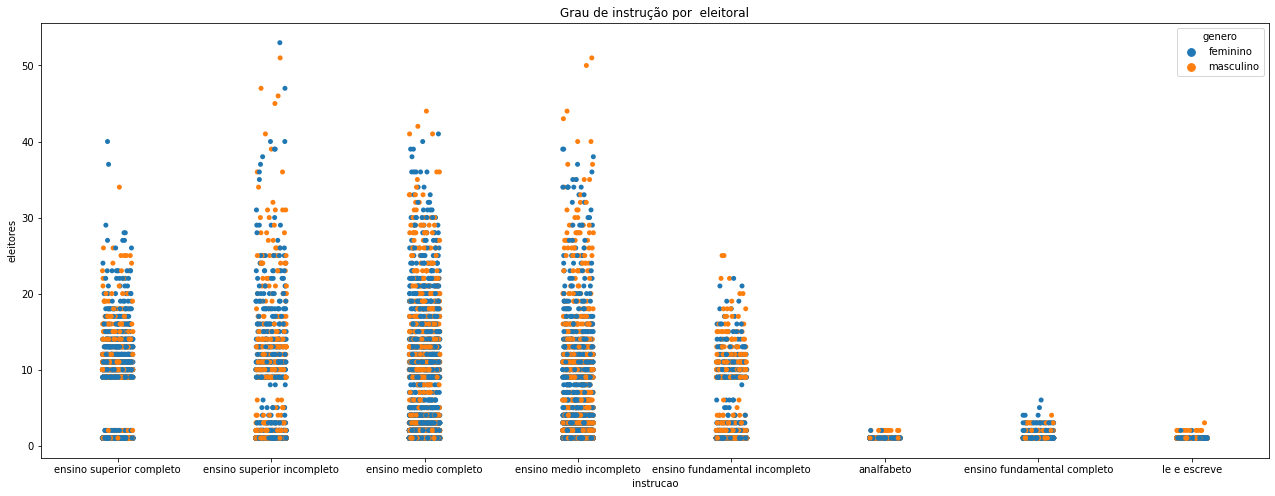

In [163]:
ax = sns.stripplot(data =perfil_secao, x = 'instrucao', y = 'eleitores', hue = 'genero')
ax.figure.set_size_inches(22, 8)
plt.title('Grau de instrução por  eleitoral');

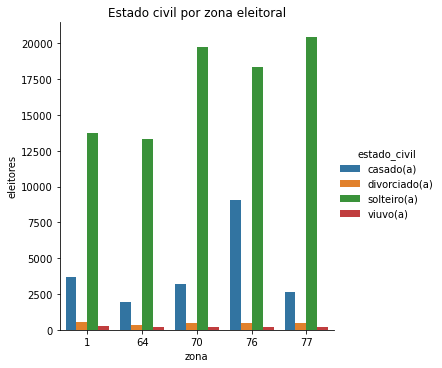

In [158]:
colunas = ['zona', 'estado_civil']
df_estado_civil = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
ax = sns.catplot(data = df_estado_civil, x = 'zona', y = 'eleitores', kind ='bar', hue = 'estado_civil')
plt.title('Estado civil por zona eleitoral');


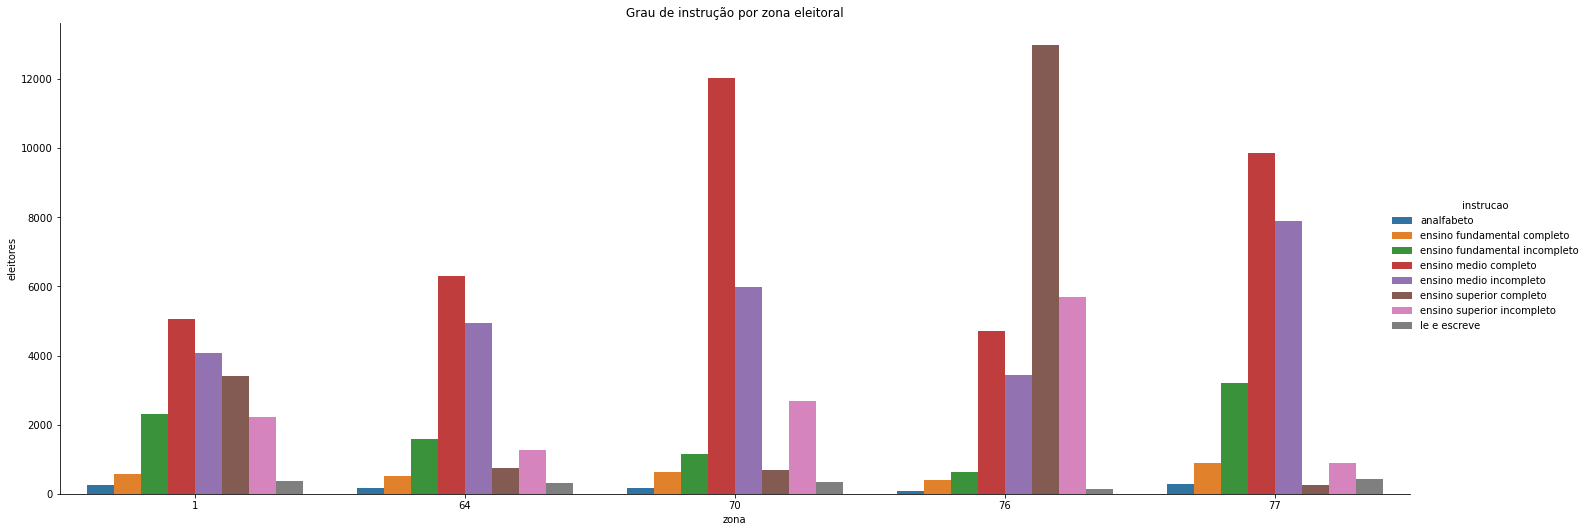

In [166]:
colunas = ['zona', 'instrucao']
df_instrucao = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_instrucao = df_instrucao.pivot(index = 'zona', columns= 'instrucao', values='eleitores')
#df_instrucao.fillna(0, inplace = True)
ax = sns.catplot(data = df_instrucao, x = 'zona', y = 'eleitores', hue = 'instrucao', kind = 'bar', height = 4, aspect = 6)
ax.figure.set_size_inches(22, 8)
plt.title('Grau de instrução por zona eleitoral');

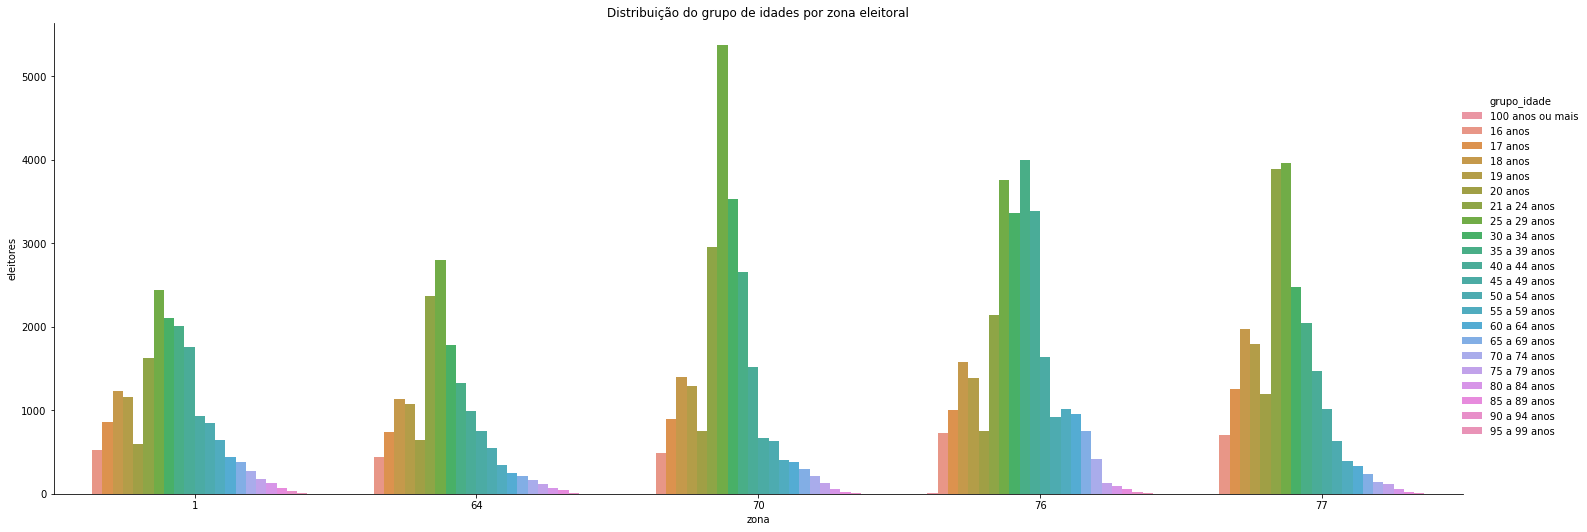

In [170]:
colunas = ['zona', 'grupo_idade']
df_grupo_idade = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_grupo_idade = df_grupo_idade.pivot(index = 'zona', columns= 'grupo_idade', values='eleitores')
df_grupo_idade.fillna(0, inplace = True)
ax = sns.catplot(data = df_grupo_idade, x = 'zona', y = 'eleitores', hue = 'grupo_idade', kind = 'bar', height = 4, aspect = 6)
plt.title('Distribuição do grupo de idades por zona eleitoral');
ax.figure.set_size_inches(22, 8)

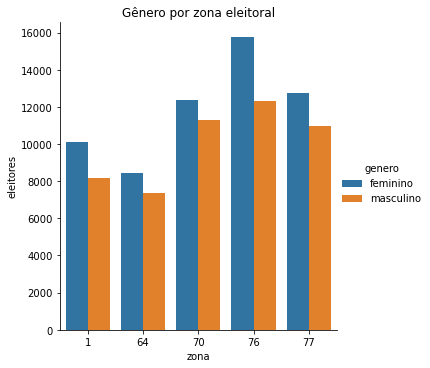

In [169]:
colunas = ['zona', 'genero']
df_genero = pd.DataFrame(perfil_secao.groupby(colunas)['eleitores'].sum()).reset_index()
#df_genero = df_genero.pivot(index = 'zona', columns= 'genero', values='eleitores')
df_genero.fillna(0, inplace = True)
sns.catplot(data = df_genero, x = 'zona', y = 'eleitores', kind ='bar', hue = 'genero')
plt.title('Gênero por zona eleitoral');